In [4]:
!pip install geopandas

  Using cached geopandas-0.13.2-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 18.6 MB 249 kB/s eta 0:00:01


In [5]:
import geopandas as gpd

In [6]:
pip install folium matplotlib mapclassify

     |████████████████████████████████| 40 kB 3.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
#Read file from geojson
import geopandas as gpd
import matplotlib.pyplot as plt
import json

# Read JSON data into GeoDataFrame
file_path = './road.geojson'
with open(file_path) as f:
    geojson_data = json.load(f)
    print(geojson_data)
gdf = gpd.read_file(file_path)

# Plot the GeoDataFrame
gdf.explore()


{'type': 'FeatureCollection', 'name': 'road', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'full_id': 'w25512375', 'osm_id': '25512375', 'osm_type': 'way', 'highway': 'trunk', 'noref': None, 'roof_mater': None, 'motor_vehi': None, 'embankment': None, 'service': None, 'lit': None, 'horse': None, 'bicycle': None, 'foot': None, 'lanes': None, 'maxspeed': None, 'noname': None, 'ele': None, 'layer': None, 'bridge': None, 'alt_name': None, 'sidewalk': None, 'name_en': None, 'surface': None, 'access': None, 'width': '8', 'ref_old': 'H03', 'ref': 'NH34', 'oneway': 'no', 'name': 'Araniko Highway', 'int_ref': 'AH42'}, 'geometry': {'type': 'MultiLineString', 'coordinates': [[[85.5314948, 27.6283734], [85.5301379, 27.6286695], [85.5298807, 27.6287194], [85.529746, 27.6287447], [85.5271675, 27.6293131], [85.5261807, 27.6295622], [85.5252474, 27.6297349], [85.5239915, 27.6300398]]]}}, {'type': 'Feature', 'properties

In [10]:
print(geojson_data)

{'type': 'FeatureCollection', 'name': 'road', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'full_id': 'w25512375', 'osm_id': '25512375', 'osm_type': 'way', 'highway': 'trunk', 'noref': None, 'roof_mater': None, 'motor_vehi': None, 'embankment': None, 'service': None, 'lit': None, 'horse': None, 'bicycle': None, 'foot': None, 'lanes': None, 'maxspeed': None, 'noname': None, 'ele': None, 'layer': None, 'bridge': None, 'alt_name': None, 'sidewalk': None, 'name_en': None, 'surface': None, 'access': None, 'width': '8', 'ref_old': 'H03', 'ref': 'NH34', 'oneway': 'no', 'name': 'Araniko Highway', 'int_ref': 'AH42'}, 'geometry': {'type': 'MultiLineString', 'coordinates': [[[85.5314948, 27.6283734], [85.5301379, 27.6286695], [85.5298807, 27.6287194], [85.529746, 27.6287447], [85.5271675, 27.6293131], [85.5261807, 27.6295622], [85.5252474, 27.6297349], [85.5239915, 27.6300398]]]}}, {'type': 'Feature', 'properties

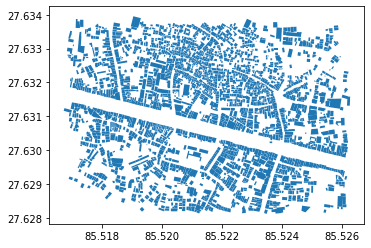

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Read the shapefile
shapefile_path = os.path.join('./buildings/buildings.shp')
gdf = gpd.read_file(shapefile_path)

# Plot the data
gdf.plot()
plt.show()


In [26]:
import requests
import json

# Bounding box coordinates
bbox = "27.6010367,85.4602795,27.6943733,85.5640106"

# Dictionary of categories and their associated amenities
amenities = {
    "Education": ["school", "university", "college", "library"],
    "Healthcare": ["hospital", "clinic", "doctors", "pharmacy"],
    "Transportation": ["bus_stop", "train_station", "airport", "parking"],
    "Food_and_Drink": ["restaurant", "cafe", "fast_food", "bar"],
    "Shopping": ["supermarket", "mall", "convenience", "clothes"],
    "Leisure_and_Entertainment": ["park", "playground", "cinema", "sports_centre"],
    "Accommodation": ["hotel", "motel", "guest_house"],
    "Financial_and_Professional": ["bank", "atm", "lawyer", "business"],
    "Public_Services": ["post_office", "police", "fire_station", "government"],
    "Worship": ["church", "mosque", "synagogue", "temple"],
    "Health_and_Beauty": ["gym", "spa", "beauty", "tattoo"],
    "Community": ["community_centre", "social_facility", "shelter"]
}

base_url = "http://overpass-api.de/api/interpreter"

for category, amenity_list in amenities.items():
    for amenity in amenity_list:
        query = f"""
        [out:json][timeout:60];
        (
          node["amenity"="{amenity}"]({bbox});
          way["amenity"="{amenity}"]({bbox});
          relation["amenity"="{amenity}"]({bbox});
        );
        out body;
        >;
        out skel qt;
        """

        response = requests.get(base_url, params={"data": query})
        data = response.json()

        # Saving the data to a file
        with open(f"{category}_{amenity}.json", "w") as outfile:
            json.dump(data, outfile)

        print(f"Saved data for {category}: {amenity} in {category}_{amenity}.json")


Saved data for Education: school in Education_school.json
Saved data for Education: university in Education_university.json
Saved data for Education: college in Education_college.json
Saved data for Education: library in Education_library.json
Saved data for Healthcare: hospital in Healthcare_hospital.json
Saved data for Healthcare: clinic in Healthcare_clinic.json
Saved data for Healthcare: doctors in Healthcare_doctors.json
Saved data for Healthcare: pharmacy in Healthcare_pharmacy.json
Saved data for Transportation: bus_stop in Transportation_bus_stop.json
Saved data for Transportation: train_station in Transportation_train_station.json
Saved data for Transportation: airport in Transportation_airport.json
Saved data for Transportation: parking in Transportation_parking.json
Saved data for Food_and_Drink: restaurant in Food_and_Drink_restaurant.json
Saved data for Food_and_Drink: cafe in Food_and_Drink_cafe.json
Saved data for Food_and_Drink: fast_food in Food_and_Drink_fast_food.jso

In [13]:
#Read File from shapefile
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import json

file_path = './road.zip'
file_name = 'road.shp'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall()

# Read JSON data into GeoDataFrame

gdf = gpd.read_file(file_name)

# Plot the GeoDataFrame
gdf.explore()

FileNotFoundError: [Errno 2] No such file or directory: './road.zip'

In [ ]:
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString
import math

# Load road network and building data
roads_gdf = gpd.read_file('/content/road.shp')
buildings_gdf = gpd.read_file('/content/buildings.shp')
print(roads_gdf.geometry)
print('\n','Now Building GDF')
print(buildings_gdf.geometry)


In [ ]:
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString
import math

# Load road network data
roads_gdf = gpd.read_file('/content/road.shp')

# Convert GeoDataFrame to NetworkX graph
G = nx.Graph()

# Add nodes and edges from the GeoDataFrame
for idx, row in roads_gdf.iterrows():
    road_geom = row['geometry']
    if isinstance(road_geom, LineString):
        # Extract nodes from LineString
        nodes = list(road_geom.coords)
        for i in range(len(nodes) - 1):
            node1 = nodes[i]
            node2 = nodes[i + 1]
            distance = math.sqrt((node2[0] - node1[0])**2 + (node2[1] - node1[1])**2)
            G.add_edge(node1, node2, weight=distance)

# Example start and end points (replace with your own points)
start_point = Point(85.53149,27.62837)
end_point = Point(85.51488,27.62595)

print(G)


In [ ]:
sp = dict(nx.all_pairs_shortest_path(G))

In [ ]:
list(G.nodes)
sp[(85.5314948, 27.6283734)][(85.5231605, 27.6279872)]

In [ ]:
nx.draw(G)